In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x=self.out(x)
        
        return x

In [4]:
torch.manual_seed(32)

model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../Data/iris.csv')

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [14]:
X = df.drop('target',axis=1)
y = df['target']

In [15]:
X = X.values
y = y.values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=33)


In [18]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
epochs = 100
losses =[]

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f"Epoch{i} and loss: {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch0 and loss: 1.1507115364074707
Epoch10 and loss: 0.9377316832542419
Epoch20 and loss: 0.7798274159431458
Epoch30 and loss: 0.6099672317504883
Epoch40 and loss: 0.4008353650569916
Epoch50 and loss: 0.25436991453170776
Epoch60 and loss: 0.15052446722984314
Epoch70 and loss: 0.10086154192686081
Epoch80 and loss: 0.08127661049365997
Epoch90 and loss: 0.07230935245752335


Text(0.5, 0, 'epochs')

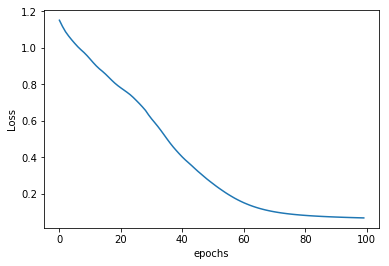

In [24]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [25]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [26]:
loss

tensor(0.0581)

In [34]:
correct = 0

with torch.no_grad():
    for i,data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)}       {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct+=1

1.) tensor([-2.1245,  4.8073, -0.8623])       1
2.) tensor([-1.7976,  5.3110, -1.5445])       1
3.) tensor([  6.3540,   0.8432, -10.0531])       0
4.) tensor([-3.9114,  4.5969,  1.1698])       1
5.) tensor([-7.4707,  3.2028,  5.7865])       2
6.) tensor([-10.4965,   1.6465,   9.6306])       2
7.) tensor([  6.3199,   0.9912, -10.1520])       0
8.) tensor([  7.0467,   0.7053, -10.9127])       0
9.) tensor([-7.2053,  3.3485,  5.3575])       2
10.) tensor([-9.3950,  2.5767,  8.1044])       2
11.) tensor([-9.8795,  2.3483,  8.7148])       2
12.) tensor([ 6.2747,  0.6650, -9.7604])       0
13.) tensor([-9.3131,  2.1888,  8.1954])       2
14.) tensor([-3.7796,  4.5061,  1.0759])       1
15.) tensor([-7.8646,  3.0127,  6.2310])       2
16.) tensor([-1.8859,  5.1583, -1.3341])       1
17.) tensor([-5.6999,  3.5039,  3.6704])       2
18.) tensor([  7.1788,   0.7363, -11.1340])       0
19.) tensor([-3.2937,  4.7942,  0.3480])       1
20.) tensor([-7.7657,  3.7639,  5.7106])       2
21.) tensor([ 

In [35]:
correct

30

In [36]:
torch.save(model.state_dict(),'my_iris_model_raman.pt')

In [41]:
new_model =Model()
new_model.load_state_dict(torch.load('my_iris_model_raman.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [42]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)